In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
HipsSumAveragebaseline         1
MMSE0m                         3
ERCsASMbaseline                4
HipsSumVariancebaseline        7
HipsVariancebaseline           8
ERCsEntropybaseline            9
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsVariancebaseline          14
HipsContrastbaseline          14
ERCsVolumebaseline            14
ERCsContrastbaseline          18
HipsClusterShadebaseline      18
HipposcampusVolumebaseline    19
HipsCorelationbaseline        20
HipsEntropybaseline           23
HipsASMbaseline               25
ERCsCorelationbaseline        28
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=42,  
)

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train.shape, X_test.shape

((425, 23), (183, 23))

In [26]:
X_train_t = X_train.dropna()
X_test_t = X_test.dropna()

X_train_t.shape, X_test_t.shape

((300, 23), (145, 23))

### Check for normal distribution and skewness change 

In [28]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

def check_normality(dataset):
    
    results = {}

    for column in dataset.columns:  
        stat, p = shapiro(dataset[column].dropna())
        skewness = skew(dataset[column].dropna())
        kurt = kurtosis(dataset[column].dropna())
        results[column] = {'Statistic': stat, 'p-value': p, 'Skewness': skewness, 'Kurtosis': kurt, 'Normal': p > 0.05} 

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    return results_df

In [29]:
X_train_norm = check_normality(X_train)
X_test_norm = check_normality(X_test)
X_train_norm_null = check_normality(X_train_t)
X_test_norm_null = check_normality(X_test_t)

In [30]:
X_train_norm

,Statistic,p-value,Skewness,Kurtosis,Normal
RID,0.960571,0.0,-0.191996,-1.042352,False
Gender,0.629481,0.0,0.280362,-1.921397,False
Ageatscreening,0.98636,0.000507,-0.352696,0.074891,False
MMSE0m,0.899325,0.0,-0.86101,0.089239,False
HipsASMbaseline,0.962064,0.0,0.527045,-0.234448,False
HipsContrastbaseline,0.991863,0.022984,0.21891,-0.294576,False
HipsCorelationbaseline,0.973015,0.000001,-0.465003,-0.239129,False
HipsVariancebaseline,0.93952,0.0,-0.707282,-0.345891,False
HipsSumAveragebaseline,0.992093,0.023528,-0.087851,-0.465718,False
HipsSumVariancebaseline,0.93146,0.0,-0.775533,-0.258937,False


In [31]:
normal_train_df = pd.DataFrame({"X_train_norm": X_train_norm["Normal"],
                                "X_train_null": X_train_norm_null["Normal"]
})

normal_test_df = pd.DataFrame({"X_test_norm": X_test_norm["Normal"],
                               "X_test_null": X_test_norm_null["Normal"]
})

In [38]:
normal_train_df

,X_train_norm,X_train_null
RID,False,False
Gender,False,False
Ageatscreening,False,False
MMSE0m,False,False
HipsASMbaseline,False,False
HipsContrastbaseline,False,False
HipsCorelationbaseline,False,False
HipsVariancebaseline,False,False
HipsSumAveragebaseline,False,False
HipsSumVariancebaseline,False,False


In [39]:
print("Total normal distribution count for X_train_norm")
print(normal_train_df["X_train_norm"].value_counts())

print("Total normal distribution count for X_test_null")
print(normal_train_df["X_train_null"].value_counts())

Total normal distribution count for X_train_norm
X_train_norm
False    20
True      3
Name: count, dtype: int64
Total normal distribution count for X_test_null
X_train_null
False    18
True      5
Name: count, dtype: int64


In [40]:
normal_test_df

,X_test_norm,X_test_null
RID,False,False
Gender,False,False
Ageatscreening,False,False
MMSE0m,False,False
HipsASMbaseline,False,False
HipsContrastbaseline,True,True
HipsCorelationbaseline,False,False
HipsVariancebaseline,False,False
HipsSumAveragebaseline,False,False
HipsSumVariancebaseline,False,False


In [41]:
print("\nTotal normal distribution count for X_train_norm")
print(normal_test_df["X_test_norm"].value_counts())

print("\nTotal normal distribution count for X_train_norm")
print(normal_test_df["X_test_null"].value_counts())


Total normal distribution count for X_train_norm
X_test_norm
False    13
True     10
Name: count, dtype: int64

Total normal distribution count for X_train_norm
X_test_null
False    12
True     11
Name: count, dtype: int64


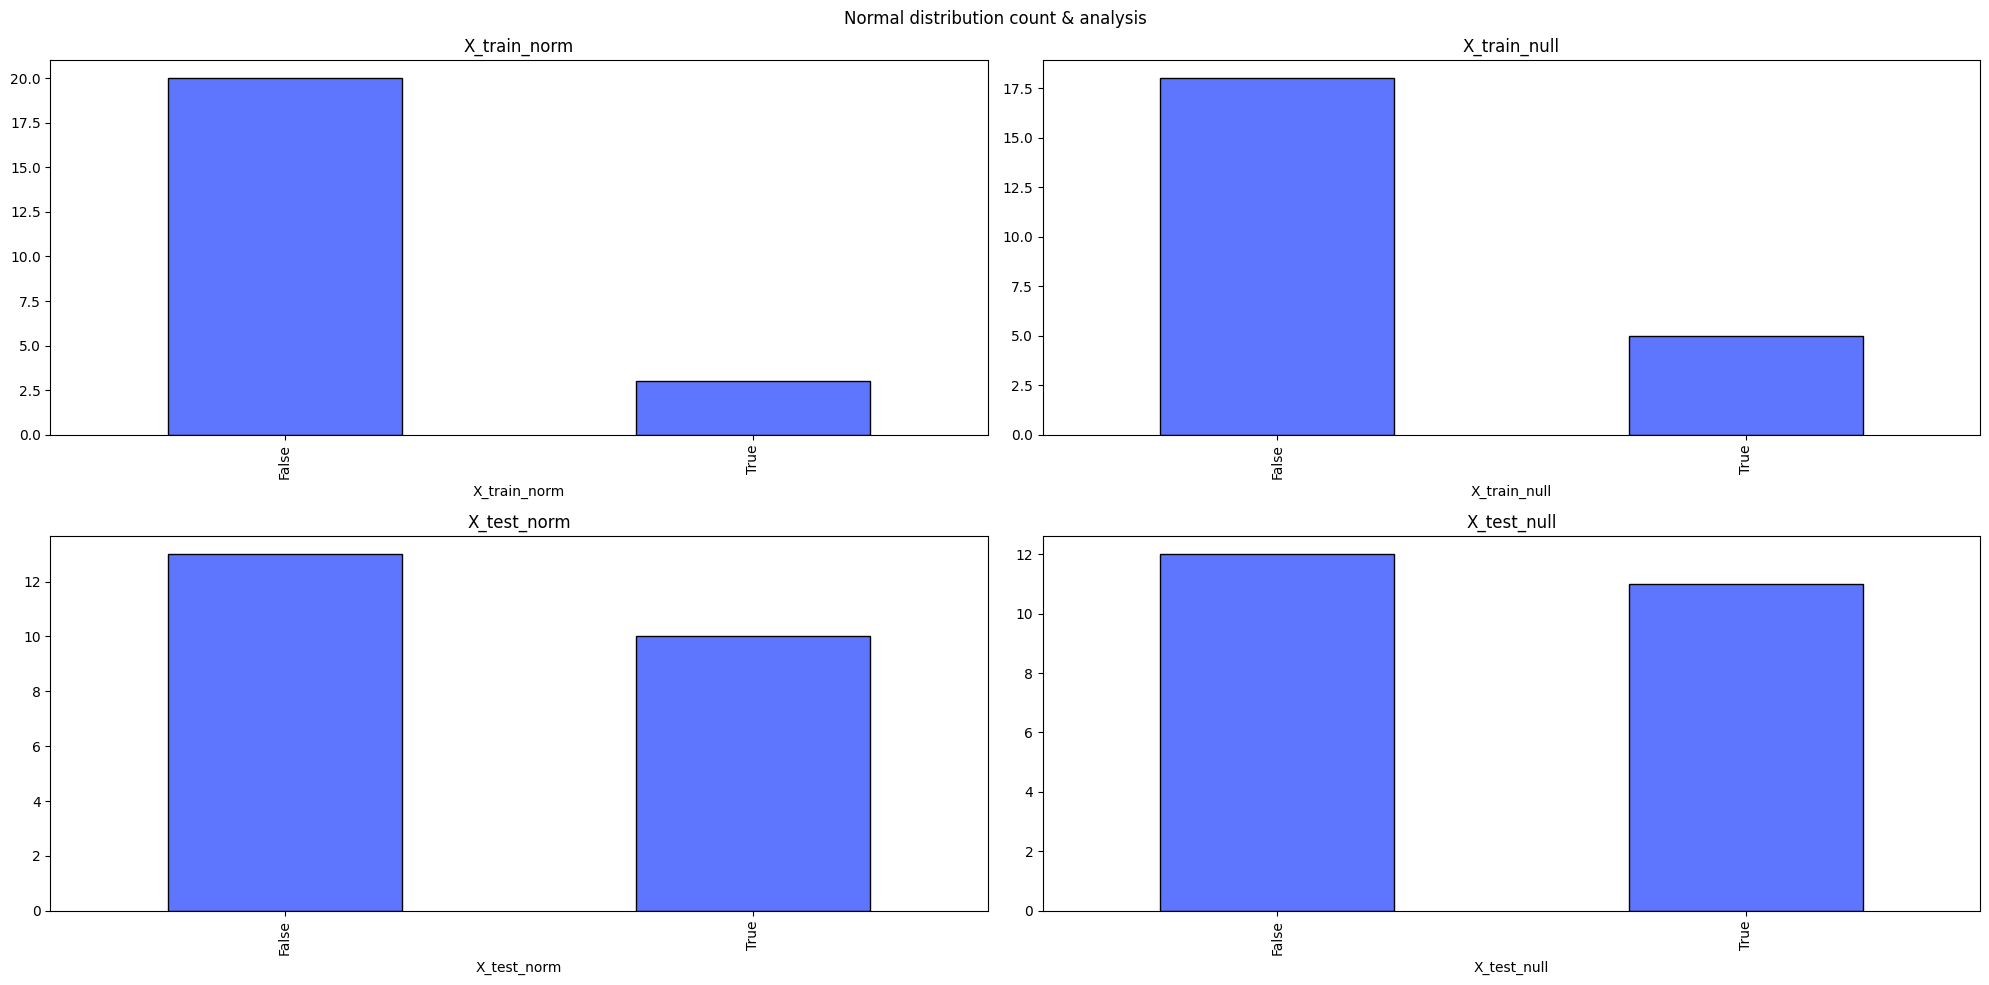

In [42]:
plt.figure(figsize=(20,10))
plt.suptitle("Normal distribution count & analysis")

plt.subplot(2, 2, 1)
normal_train_df["X_train_norm"].value_counts().plot(kind="bar",
                                             color = "#5e76fe",
                                             edgecolor = "black",
                                             label = "X_train_norm")
plt.title("X_train_norm")

plt.subplot(2, 2, 2)
normal_train_df["X_train_null"].value_counts().plot(kind="bar",
                                             color = "#5e76fe",
                                             edgecolor = "black",
                                             label = "X_train_norm")
plt.title("X_train_null")

plt.subplot(2, 2, 3)
normal_test_df["X_test_norm"].value_counts().plot(kind="bar",
                                             color = "#5e76fe",
                                             edgecolor = "black",
                                             label = "X_test_norm")
plt.title("X_test_norm")

plt.subplot(2, 2, 4)
normal_test_df["X_test_null"].value_counts().plot(kind="bar",
                                             color = "#5e76fe",
                                             edgecolor = "black",
                                             label = "X_test_norm")
plt.title("X_test_null")

plt.tight_layout()

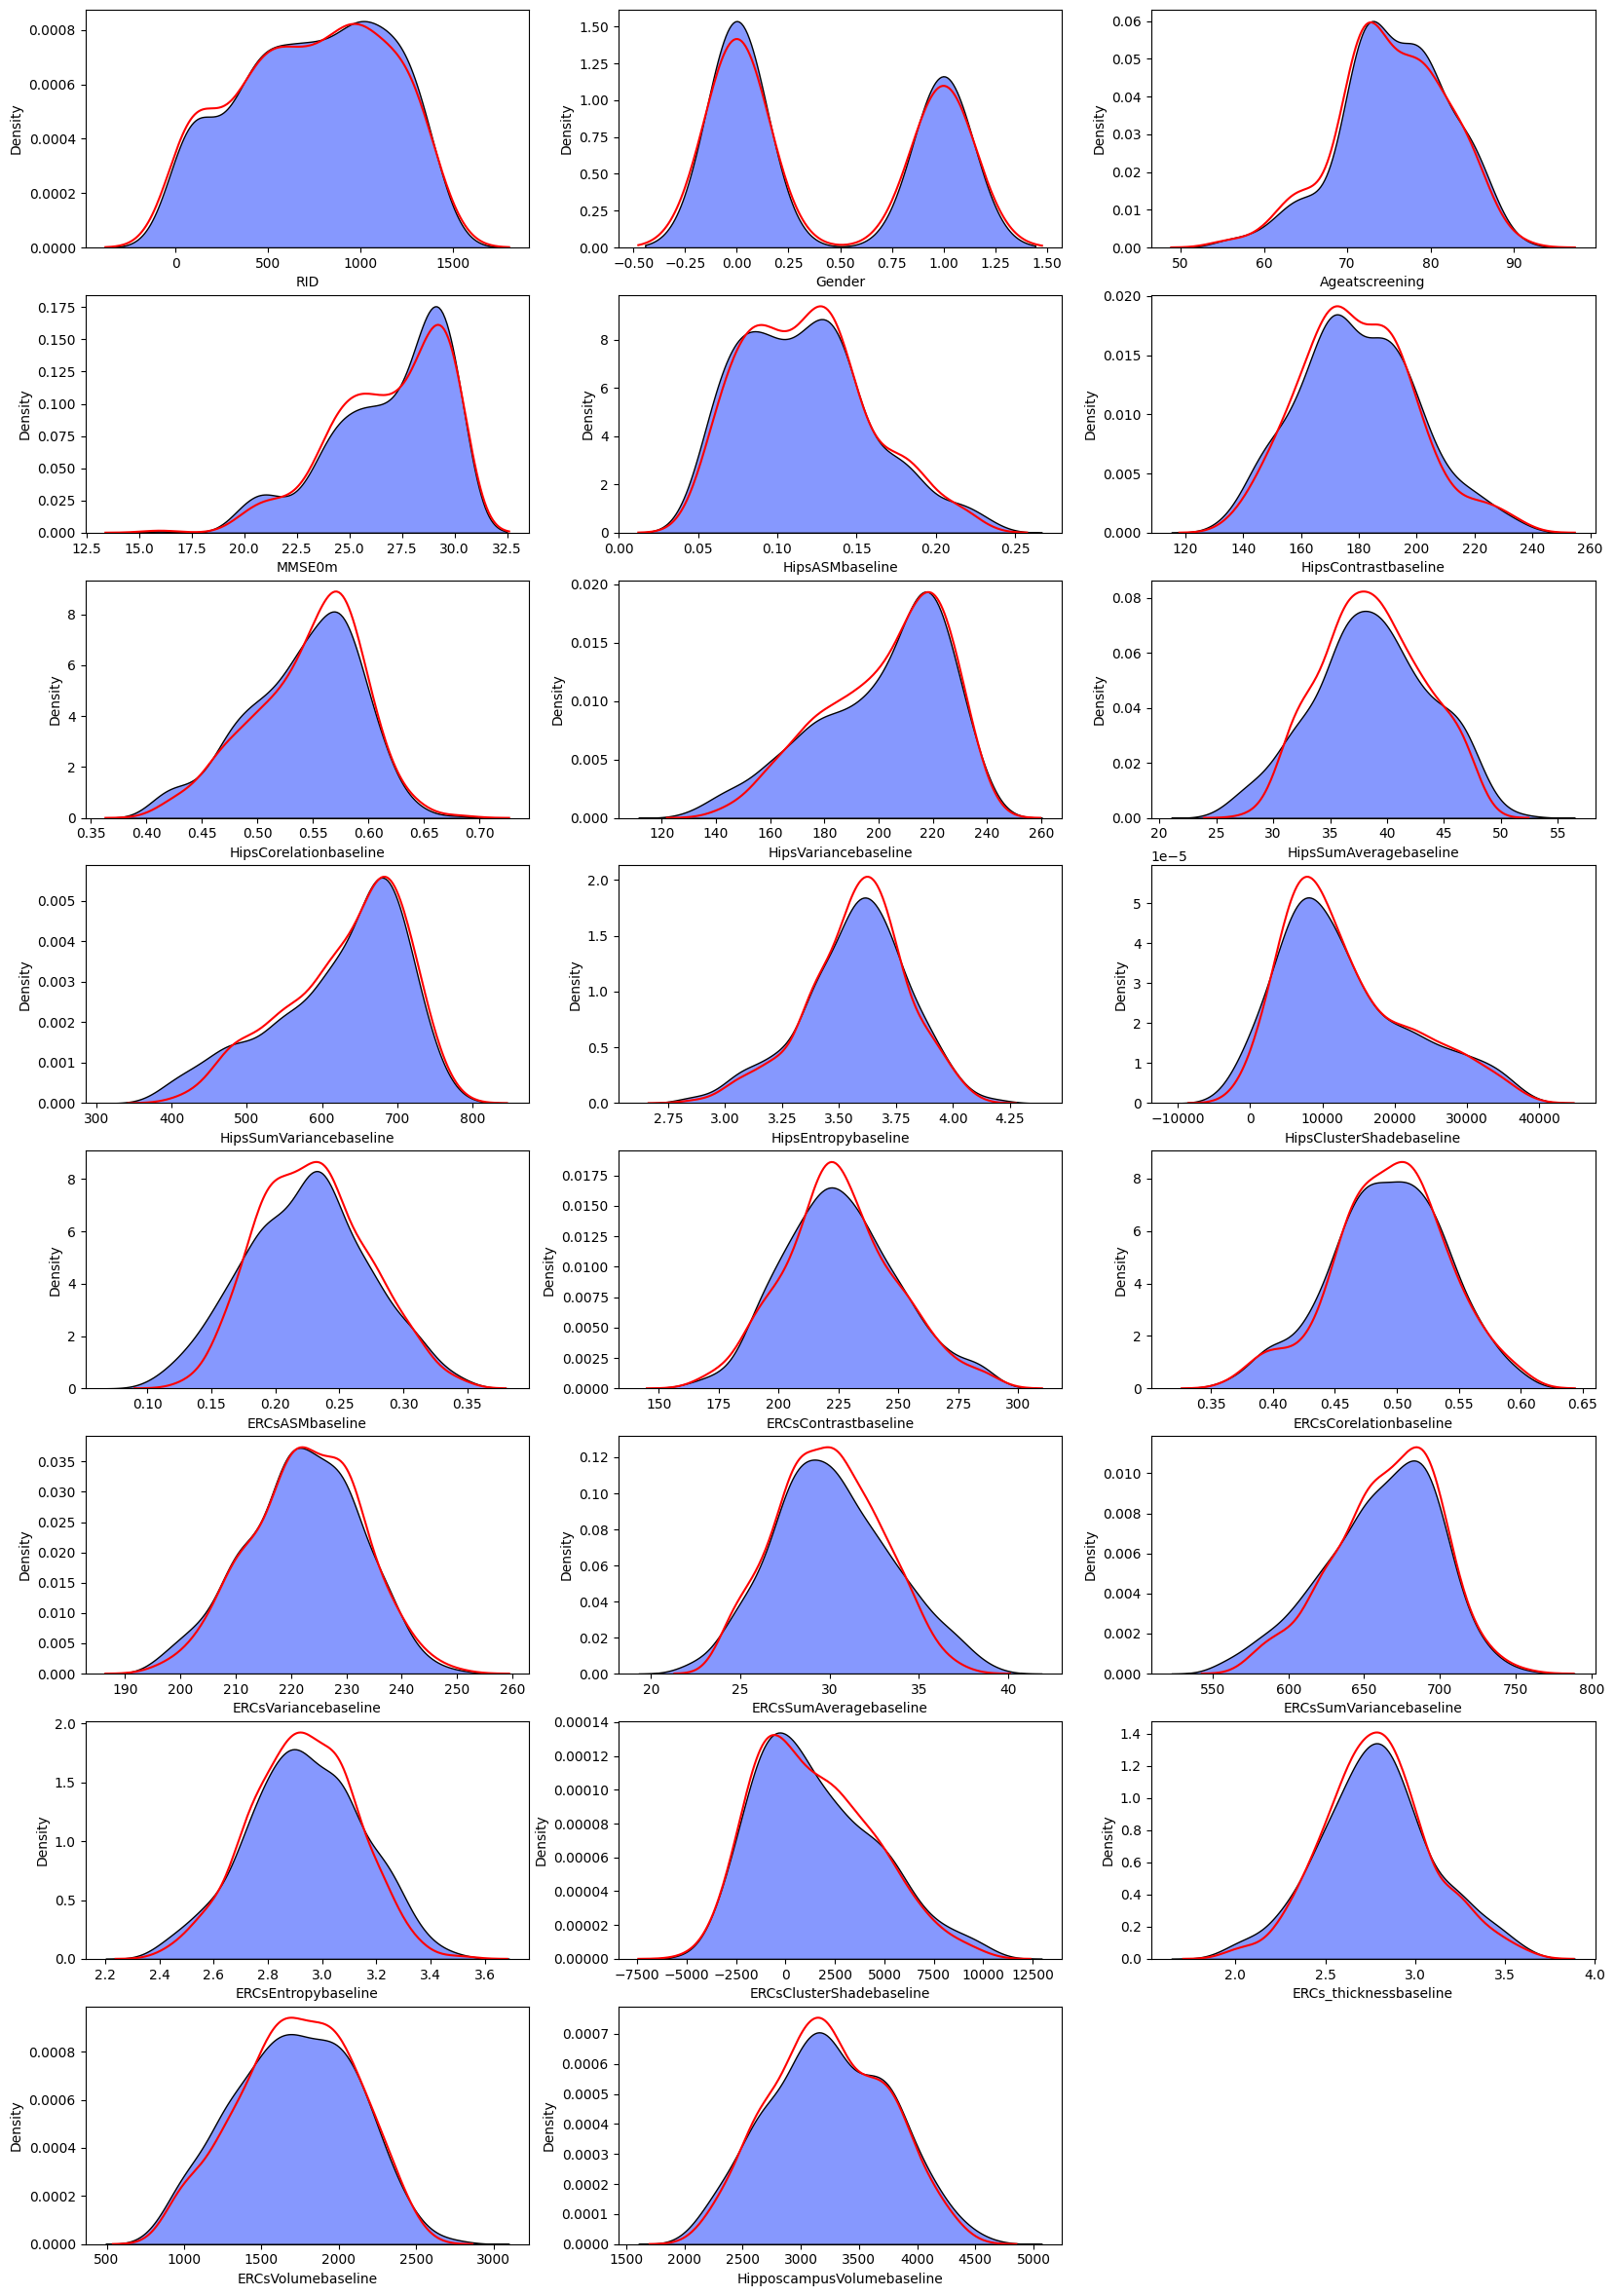

In [43]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_copy[X_train_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_t[X_train_t.columns[i]], color= "red")

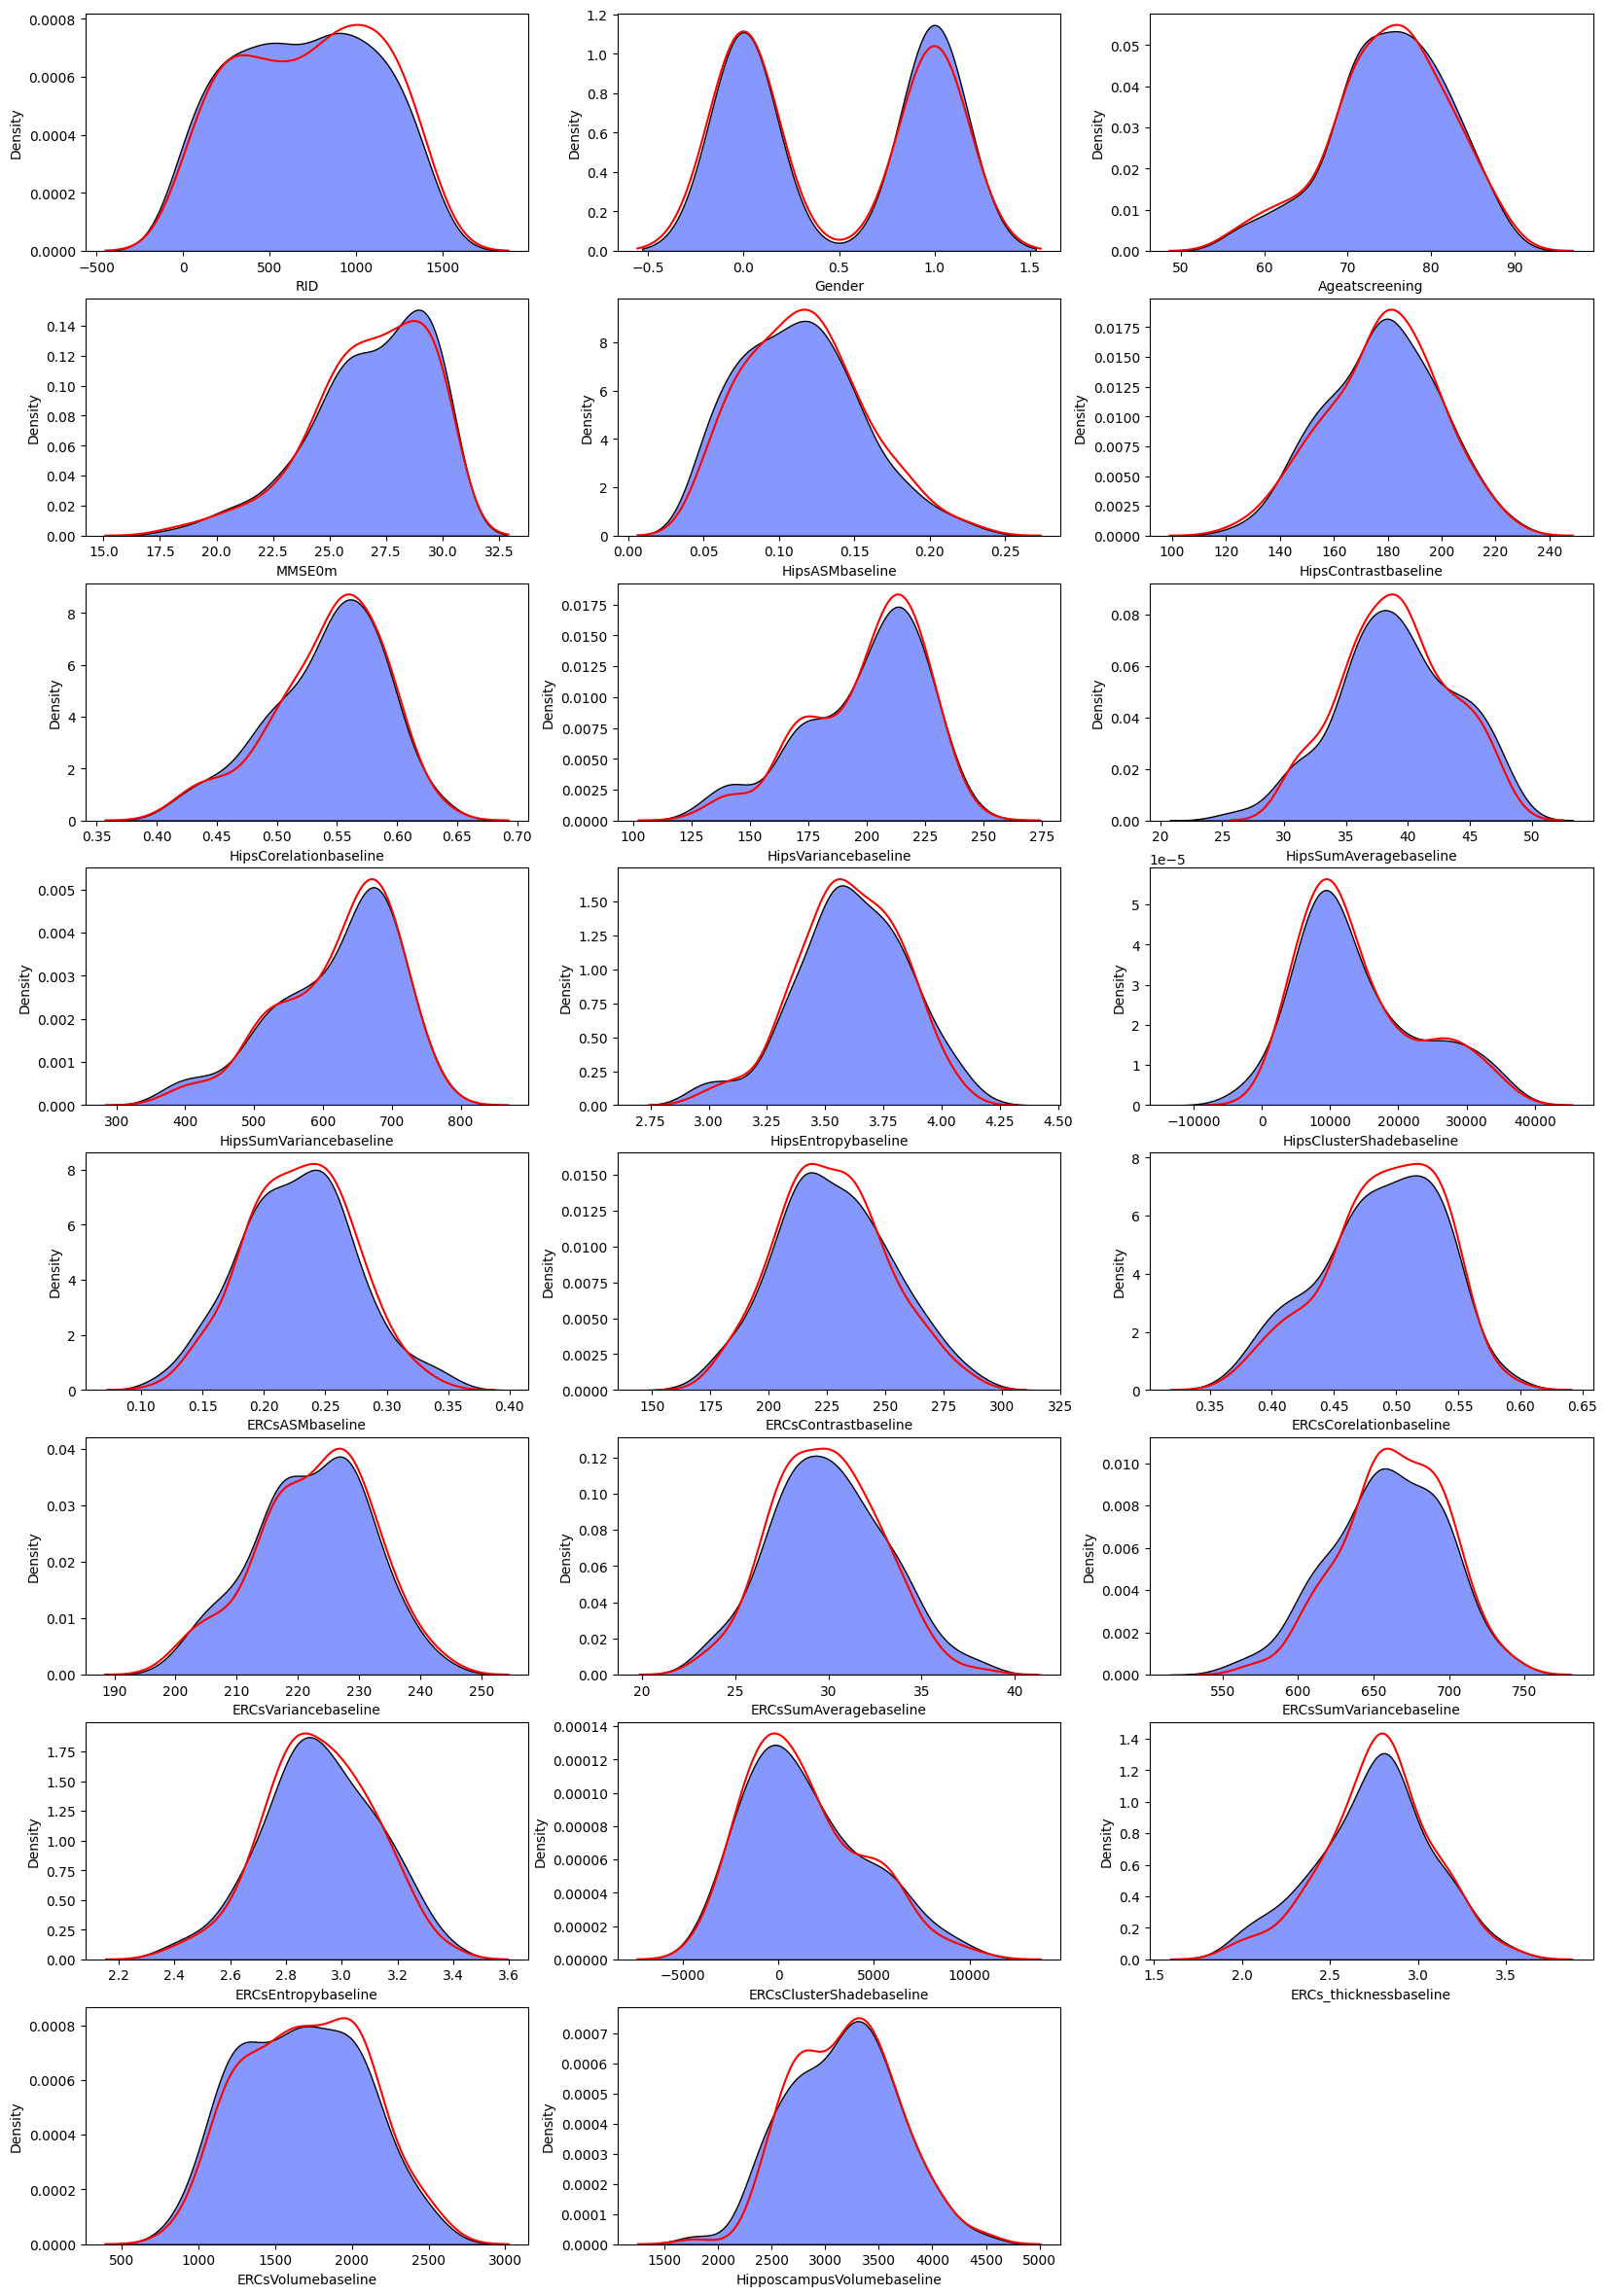

In [45]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_copy[X_test_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_t[X_test_t.columns[i]], color= "red")

### Check for variance change

In [46]:
variance_train_df = pd.DataFrame({"X_train_std": X_train.var(),
              "X_train_null std": X_train_t.var(),
            }
)

variance_train_df["Changed"] = (variance_train_df.nunique(axis=1) > 1)

variance_test_df = pd.DataFrame({"X_test": X_test.var(),
              "X_test_null std": X_test_t.var(),
            }
)

variance_test_df["Changed"] = (variance_test_df.nunique(axis=1) > 1)


In [47]:
variance_train_df

,X_train_std,X_train_null std,Changed
RID,1.563815e+05,1.602314e+05,True
Gender,2.457603e-01,2.468116e-01,True
Ageatscreening,4.307941e+01,4.360332e+01,True
MMSE0m,7.689551e+00,7.302330e+00,True
HipsASMbaseline,1.686332e-03,1.537900e-03,True
HipsContrastbaseline,4.227328e+02,3.852780e+02,True
HipsCorelationbaseline,2.584648e-03,2.367736e-03,True
HipsVariancebaseline,5.847527e+02,4.832163e+02,True
HipsSumAveragebaseline,2.642004e+01,1.941875e+01,True
HipsSumVariancebaseline,7.585556e+03,6.155663e+03,True


In [48]:
print(variance_train_df["Changed"].value_counts())

Changed
True    23
Name: count, dtype: int64


In [49]:
variance_test_df

,X_test,X_test_null std,Changed
RID,1.654556e+05,1.673532e+05,True
Gender,2.513061e-01,2.514368e-01,True
Ageatscreening,4.862086e+01,4.995195e+01,True
MMSE0m,7.112112e+00,6.943008e+00,True
HipsASMbaseline,1.611935e-03,1.552854e-03,True
HipsContrastbaseline,4.375496e+02,4.301622e+02,True
HipsCorelationbaseline,2.353091e-03,2.259004e-03,True
HipsVariancebaseline,6.732886e+02,5.941448e+02,True
HipsSumAveragebaseline,2.277794e+01,1.849628e+01,True
HipsSumVariancebaseline,7.896207e+03,7.142405e+03,True


In [50]:
print(variance_test_df["Changed"].value_counts())

Changed
True    23
Name: count, dtype: int64


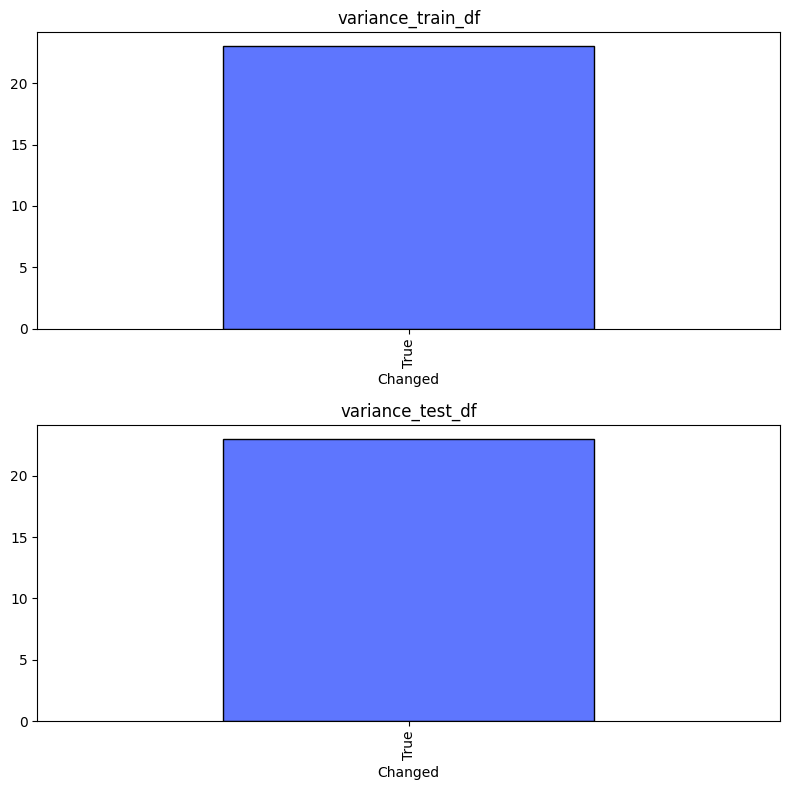

In [52]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
variance_train_df["Changed"].value_counts().plot(kind="bar",
                                           color = "#5e76fe",
                                           edgecolor = "black",
)

plt.title("variance_train_df")

plt.subplot(2,1,2)
variance_test_df["Changed"].value_counts().plot(kind="bar",
                                           color = "#5e76fe",
                                           edgecolor = "black",
)

plt.title("variance_test_df")

plt.tight_layout()

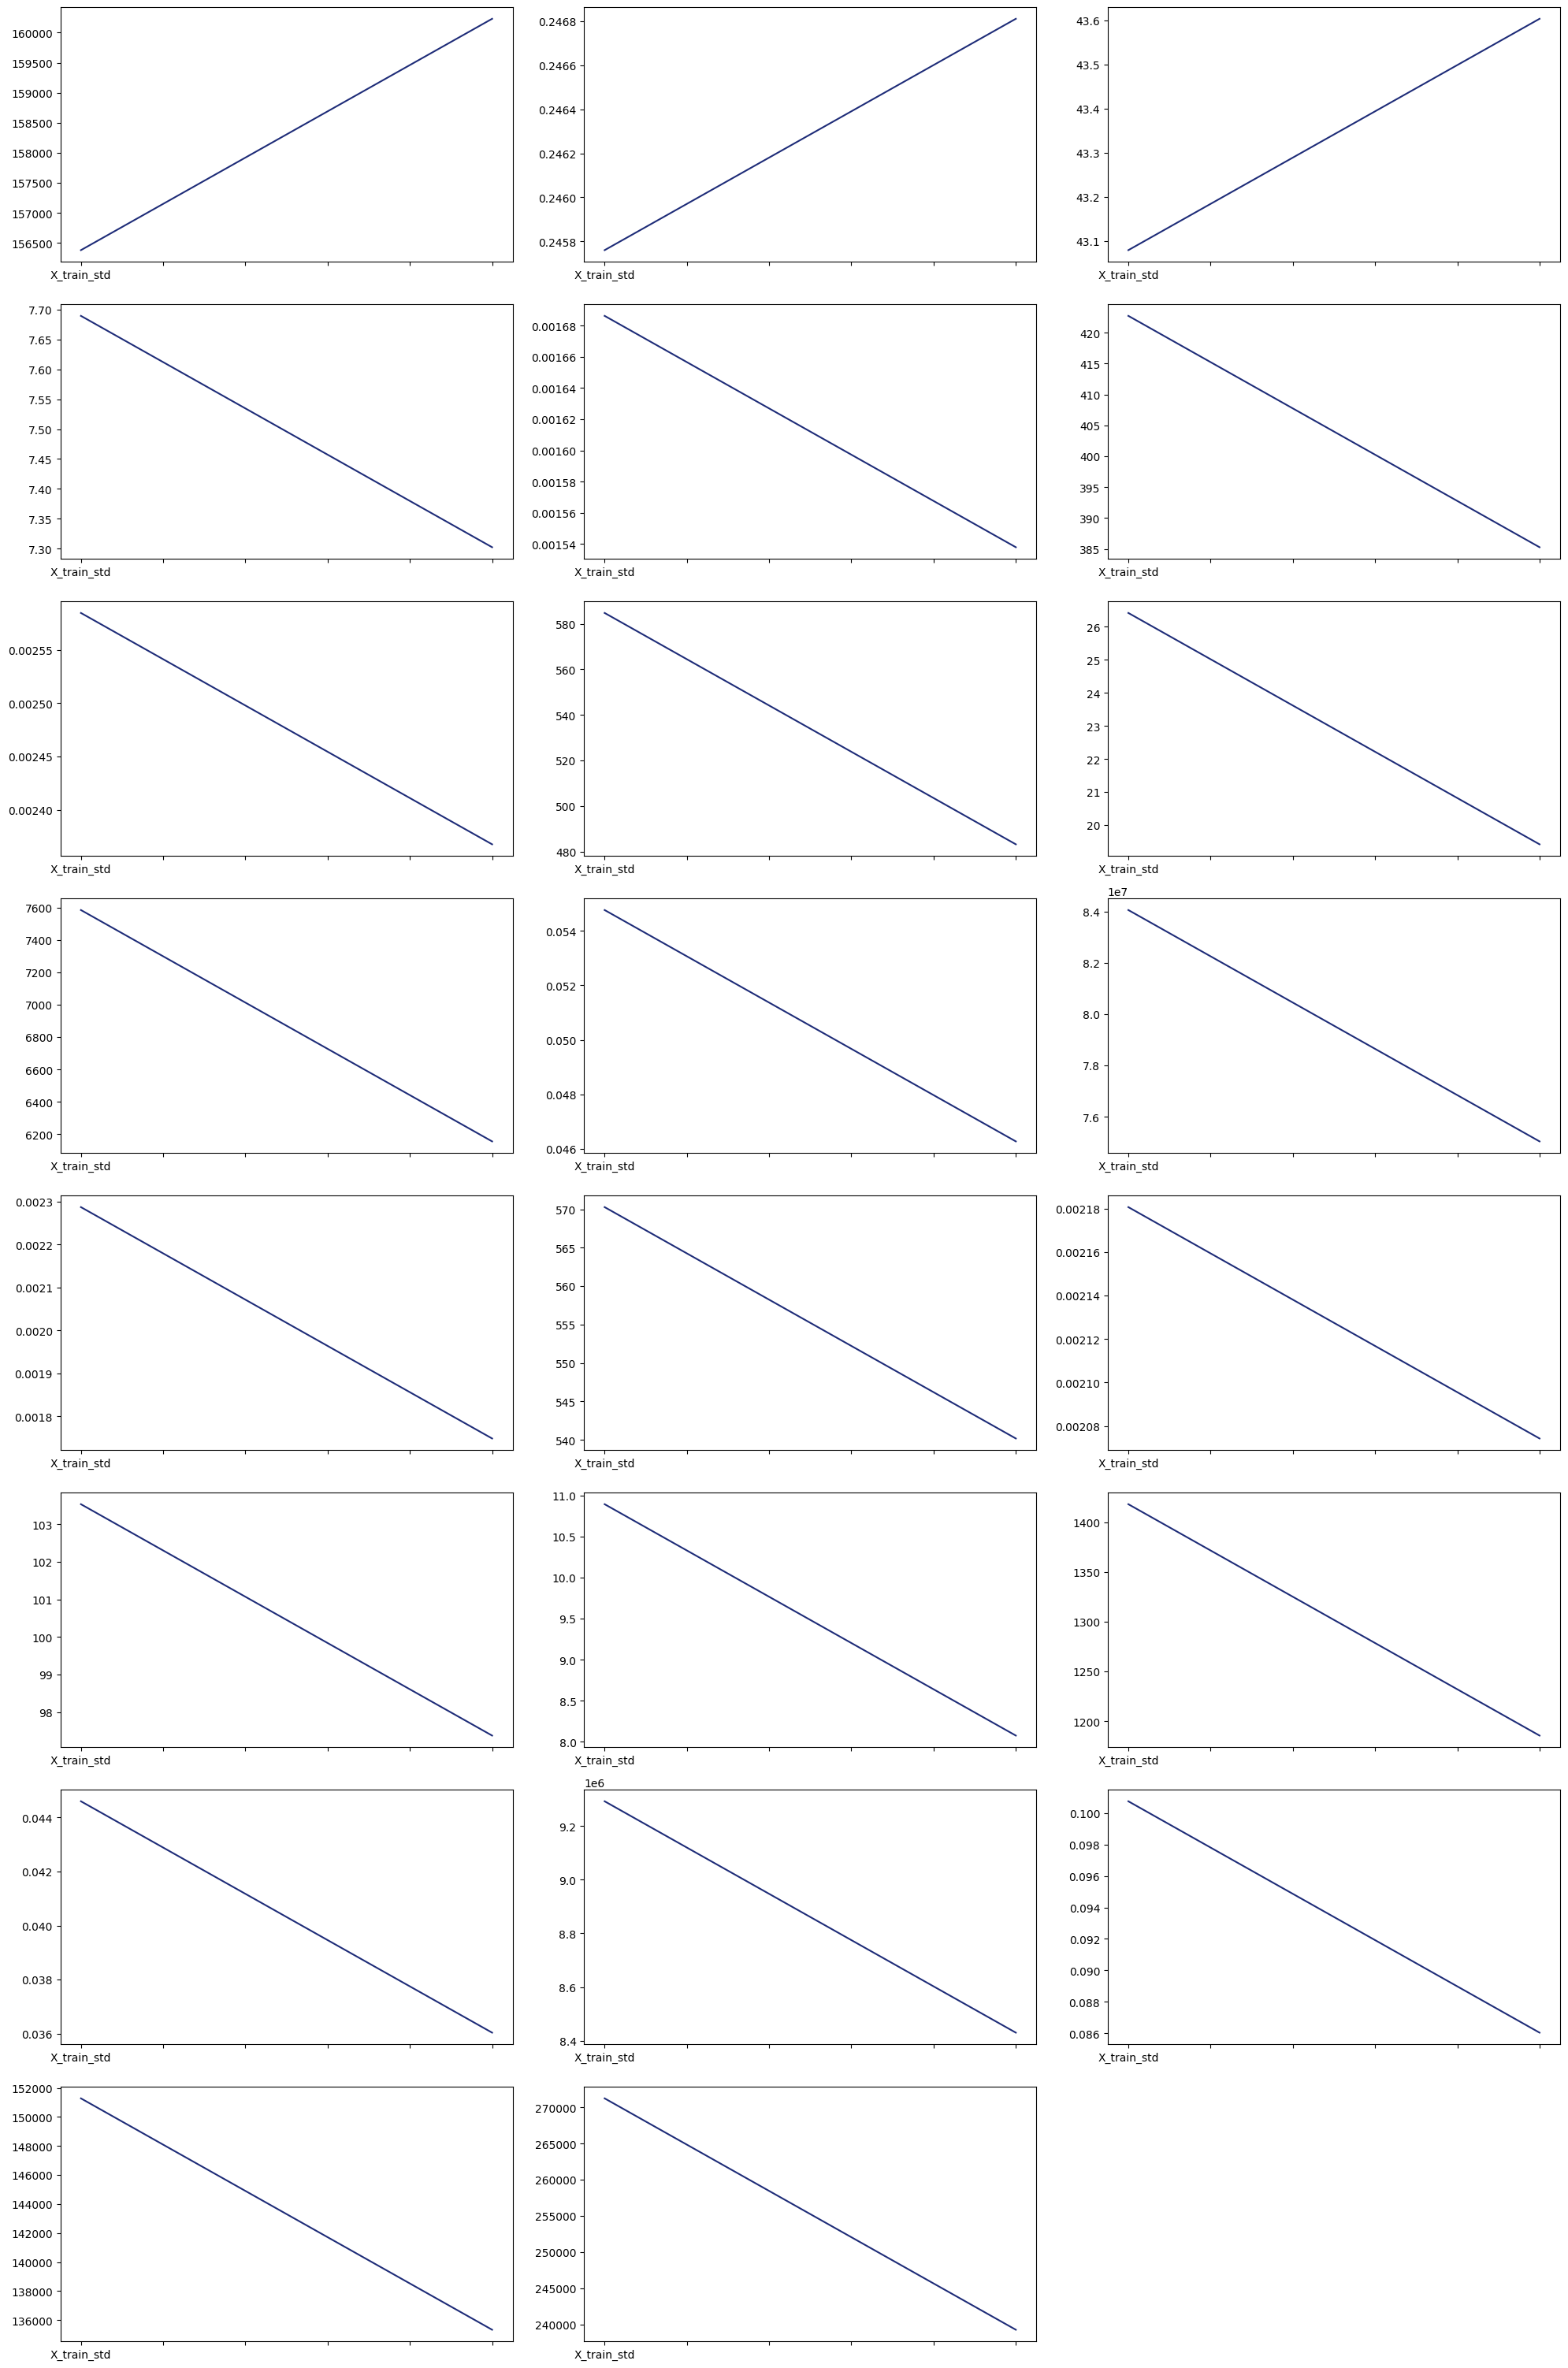

In [53]:
plt.figure(figsize=(20, 45))

for i in range(len(variance_train_df)):
    plt.subplot(12,3,i+1)
    variance_train_df.iloc[i].drop("Changed").plot(kind="line",
                                             color="#1e2c78",
    )
    
plt.tight_layout()

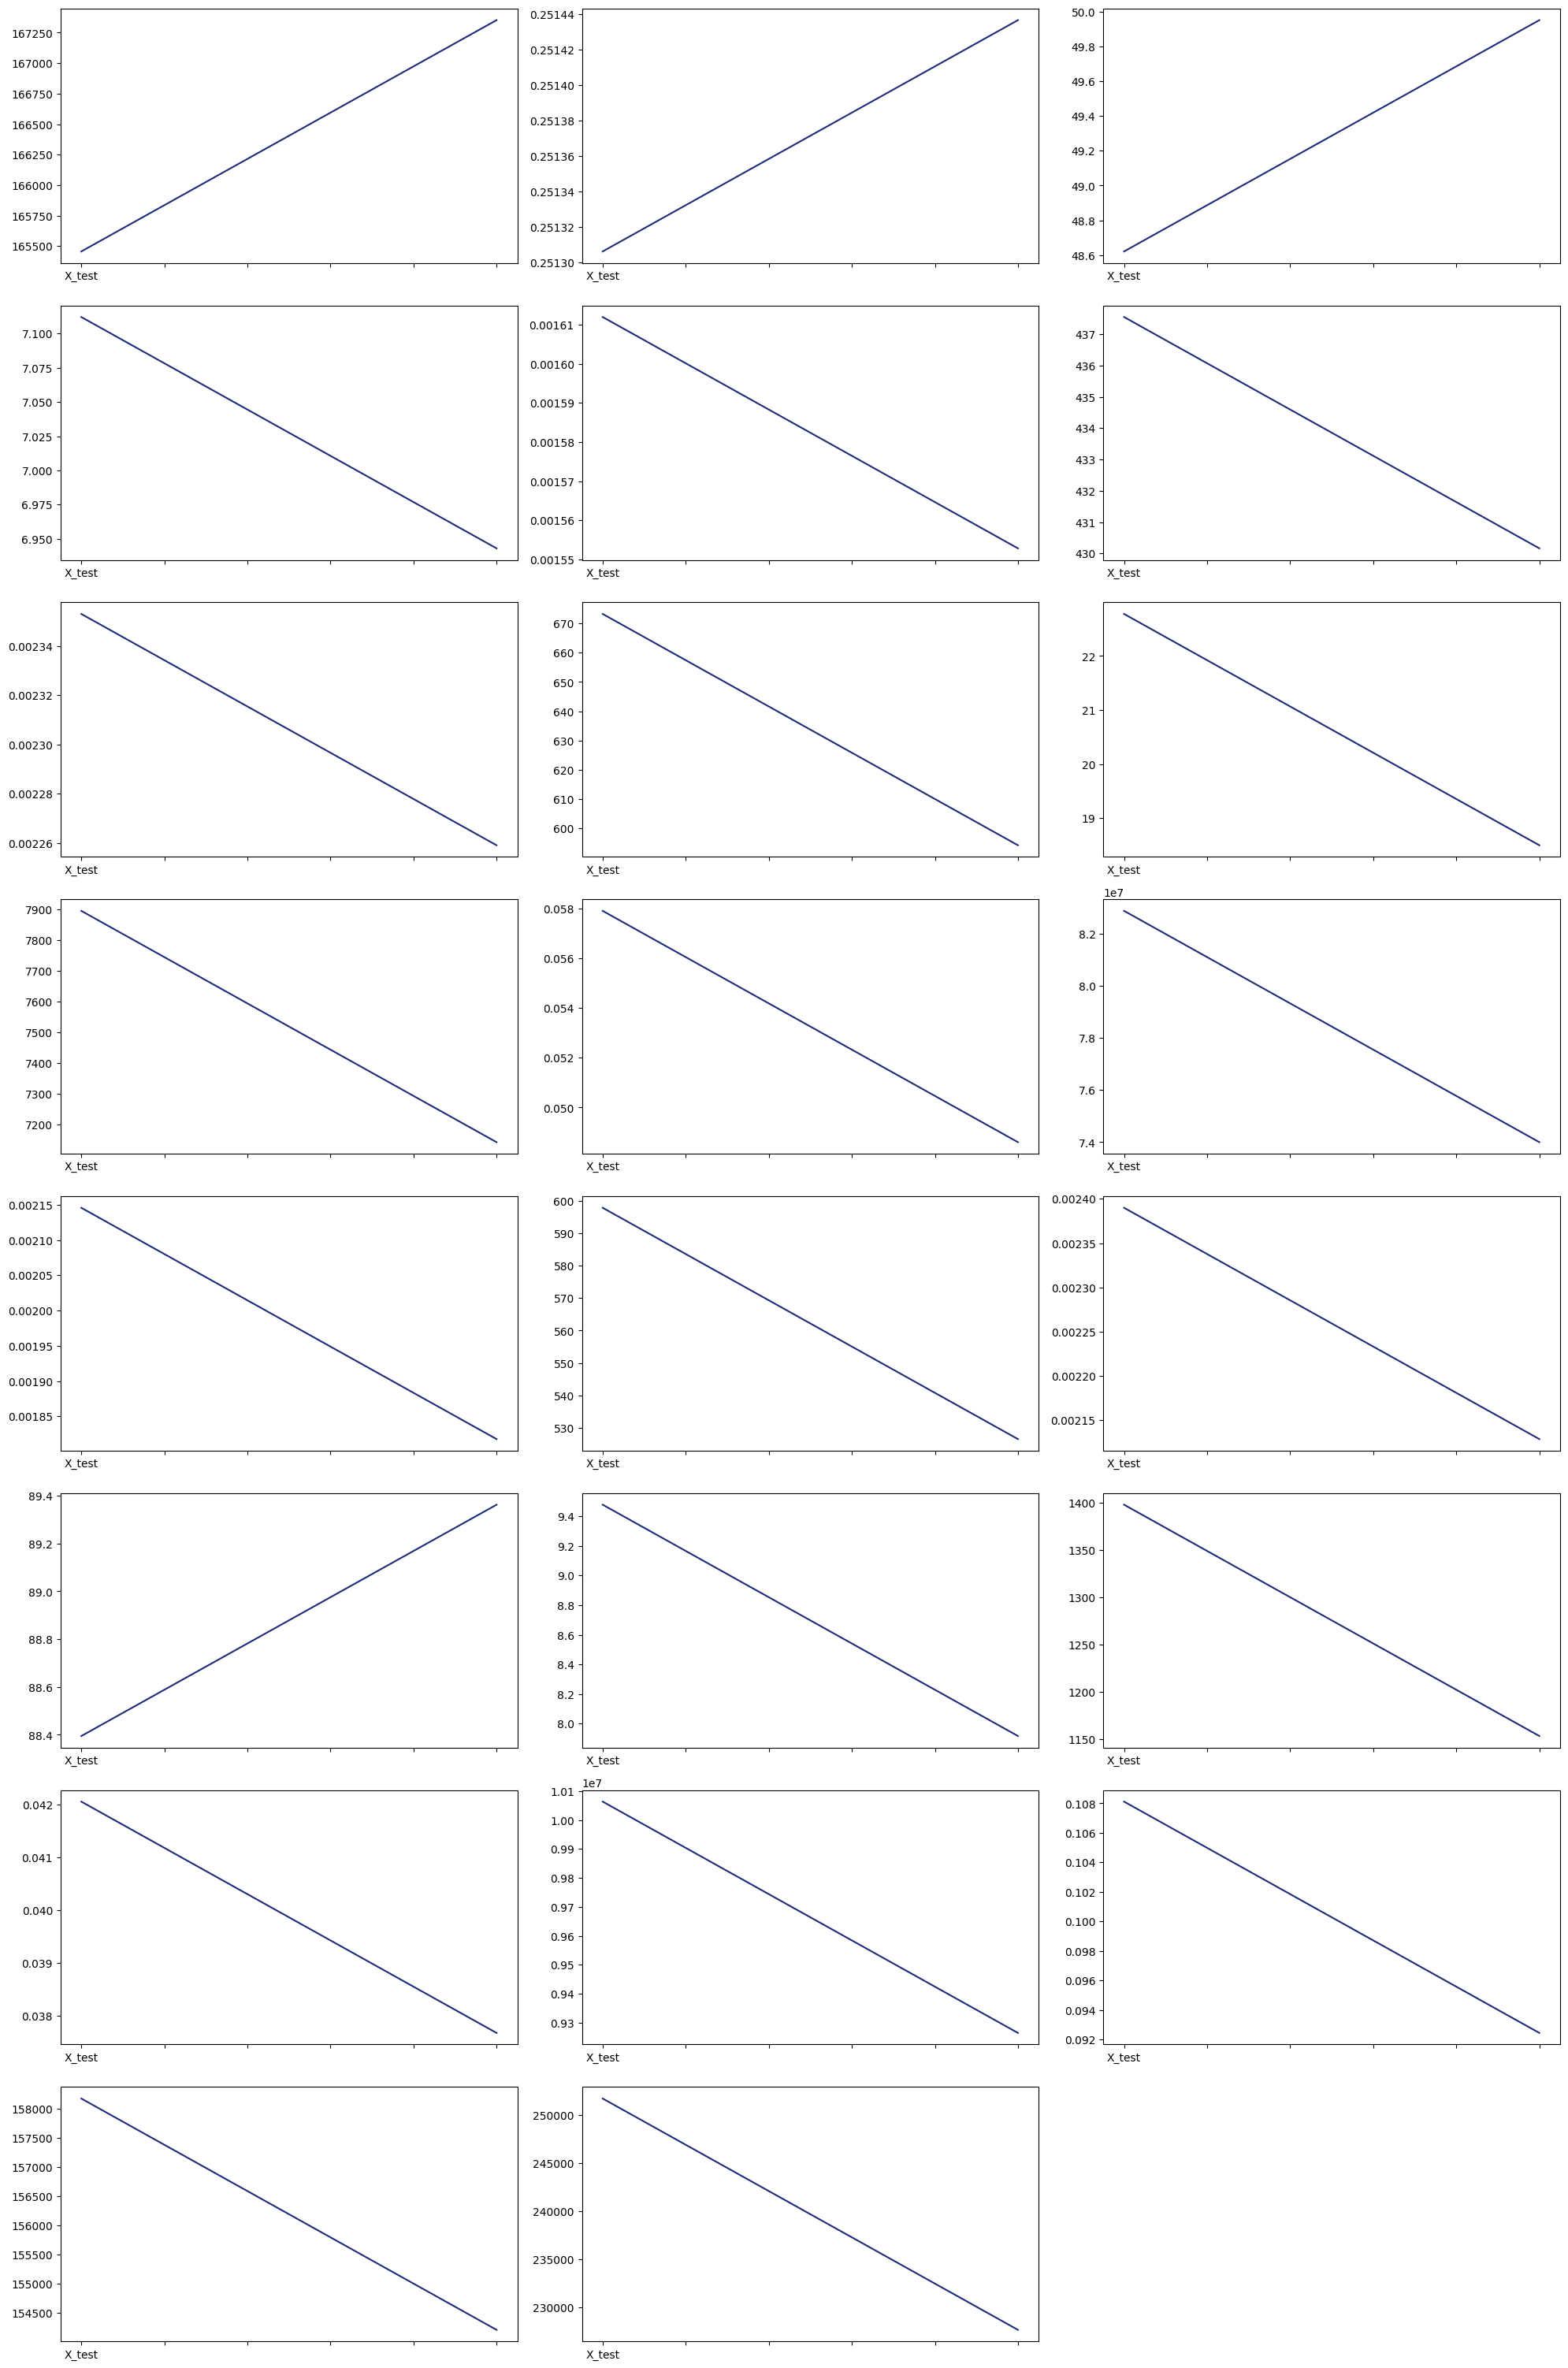

In [56]:
plt.figure(figsize=(20, 45))

for i in range(len(variance_test_df)):
    plt.subplot(12,3,i+1)
    variance_test_df.iloc[i].drop("Changed").plot(kind="line",
                                             color="#1e2c78",
    )
    
plt.tight_layout()